In [6]:
#import all the packages

import shap
import pandas as pd
import pickle
import copy
import seaborn as sns
from matplotlib import gridspec

import numpy as np
import os 
import copy
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [2]:
import os
for dirname, _, filenames in os.walk('/D:/Research-Semester/RP/Wind_turbine_code/wine_pipeline/data'): 
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#load the dataset
# Step 1: Load and preprocess the dataset
file_path = '/Research-Semester/RP/Wind_turbine_code/wine_pipeline/data/base/Solar_categorical.csv'  # Update with the actual file path
data = pd.read_csv(file_path)

In [4]:
# Feature names and target column
features = ["S1(Amp)", "S2(Amp)", "S1(Volt)", "S2(Volt)", "Light(kiloLux)", "Temp(degC)", "Weather"]
target = 'State'

In [7]:
# Encode the categorical target variable
data.columns = data.columns.str.strip()

label_encoder = {}
for col in features:
    if data[col].dtype == 'object':  # If column is categorical
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoder[col] = le
        


In [8]:
# Split the dataset into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 2: Train the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

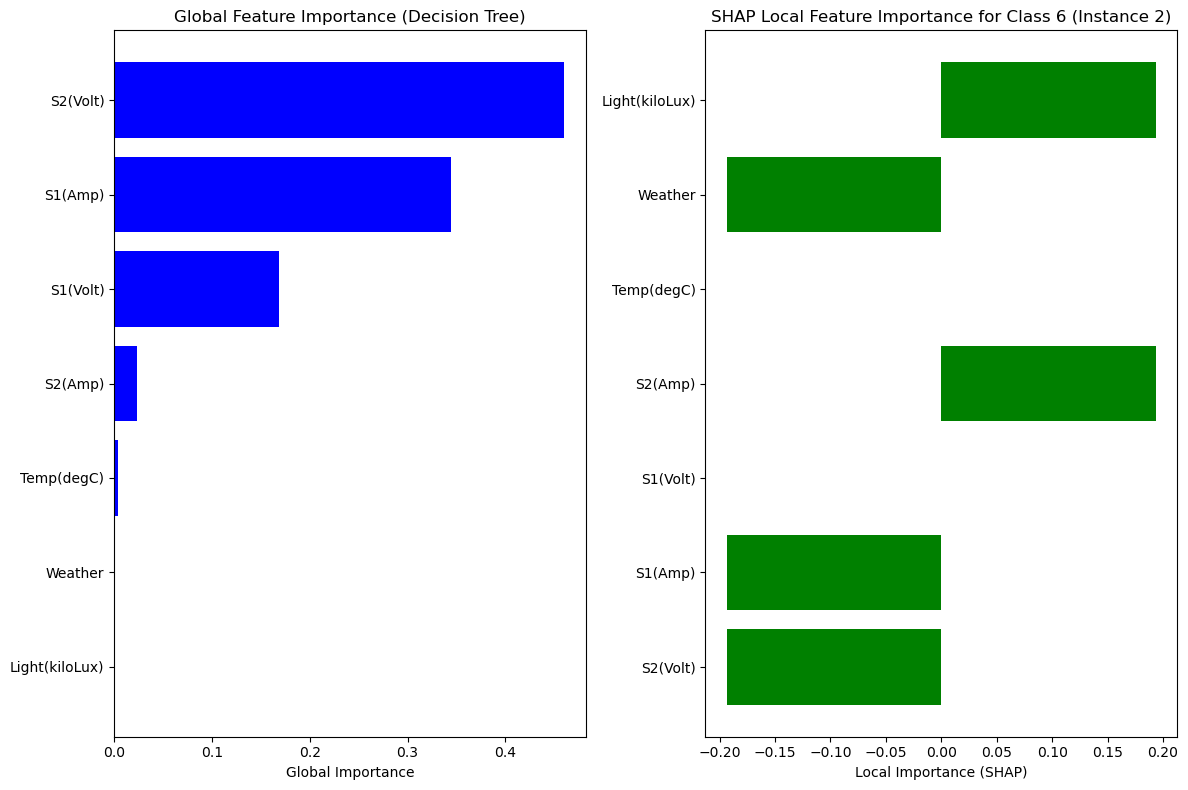

In [11]:
# Assuming model is your trained DecisionTreeClassifier and X_train is your training data
# Create the SHAP Explainer for the model
explainer = shap.TreeExplainer(model)

# Feature names
feature_names =  ["S1(Amp)", "S2(Amp)", "S1(Volt)", "S2(Volt)", "Light(kiloLux)", "Temp(degC)", "Weather"]

# Step 1: Calculate SHAP values for all instances in the test set
# shap_values[1] corresponds to the SHAP values for class 5 (for multiclass problems)
shap_values = explainer.shap_values(X_test)

# Select class 6 (assuming class 6 corresponds to index 3 in shap_values 2 = 0, 5 = 2 , 6 = 3)
class_index = 3  # Adjust this index if your class mapping is different
shap_values_class = shap_values[class_index]

# Step 2: Global feature importance from the DecisionTreeClassifier
tree_feature_importances = model.feature_importances_

# Step 3: SHAP feature importance for a specific instance
instance_index = 2  # You can change this to any other index
shap_importances_local = shap_values_class[instance_index]  # SHAP values for the instance

# Step 4: Ensure the feature order is consistent between global and local (SHAP)
# Sort features by global importance for easier comparison
sorted_indices = np.argsort(tree_feature_importances)[::-1]

# Ensure the length of SHAP values matches the number of features
if len(shap_importances_local) != len(feature_names):
    print(f"Warning: SHAP values size {len(shap_importances_local)} does not match feature names size {len(feature_names)}")
    # Truncate or pad shap_importances_local to match feature_names length
    shap_importances_local = np.resize(shap_importances_local, len(feature_names))

# Step 5: Plot the comparison

# Global feature importance (DecisionTreeClassifier)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Global Feature Importance (Decision Tree)")
plt.barh(np.array(feature_names)[sorted_indices], tree_feature_importances[sorted_indices], color='blue')
plt.xlabel("Global Importance")
plt.gca().invert_yaxis()

# Local feature importance (SHAP)
plt.subplot(1, 2, 2)
plt.title(f"SHAP Local Feature Importance for Class {class_index+3} (Instance {instance_index})")
plt.barh(np.array(feature_names)[sorted_indices], np.array(shap_importances_local)[sorted_indices], color='green')
plt.xlabel("Local Importance (SHAP)")

plt.tight_layout()
plt.show()
